# Problem Statement

In this problem we want to predict the loan status of an applicant, either the loan is passed and represented by valye 'Y' or not passed which is represented by 'N', so this is basically a classification problem, where we have to predict between two labels. Which is a good place to start for a newbee.

Loan Status Prediction - 0/1 - Binary Classification Problem

Steps to follow :

- Data Collection 
- Data Preprocessing
- Data Exploration
- Feautre Engineering
- Modeling 
- Validation
- Comparision of diffirent models

# Dependencies

In [107]:
# importing all the required libraries

import pandas as pd #for dataframes
import numpy as np  #for mathematical operation
import matplotlib as plt #for plotting charts
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression #importing logisticRegression model
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier #importing RandomForest Classifier Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz #importing DecisionTreeClassifier Model
from sklearn import metrics
%matplotlib inline

# Data Collection

We have got the data from Analytics Vidya, please check the link to download the data.

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/?utm_source=introduction-neural-networks-deep-learning


# Data Cleaning and Exploration

In [108]:
training_data = pd.read_csv(r"C:\Users\asus\Desktop\python\loan\train_ctrUa4K2.csv")
test_data = pd.read_csv(r"C:\Users\asus\Desktop\python\loan\test_lAUu6dG.csv")

In [109]:
training_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [110]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [111]:
training_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

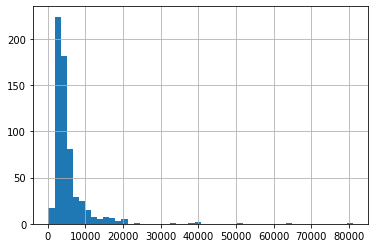

In [112]:
training_data['ApplicantIncome'].hist(bins=50)

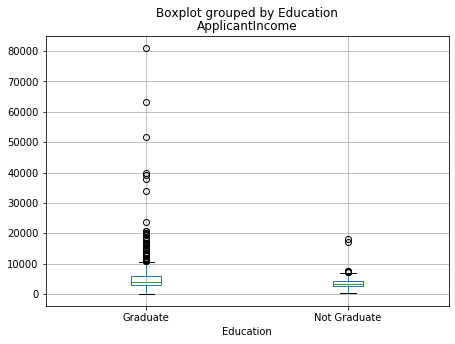

In [113]:
training_data.boxplot(column= 'ApplicantIncome', by='Education', figsize = (7, 5))

In [114]:
temp1 = training_data['Credit_History'].value_counts(ascending=True)
temp2 = training_data.pivot_table(values='Loan_Status', index = ['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print("\n Probability of getting loan for each Credit History class:")
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Above data clearly shows that credit history have noticable impact on loan status, if credit history is 1 the probability of getting loan is .7957 and if credit history is 0 the probability of getting loan is .078652.

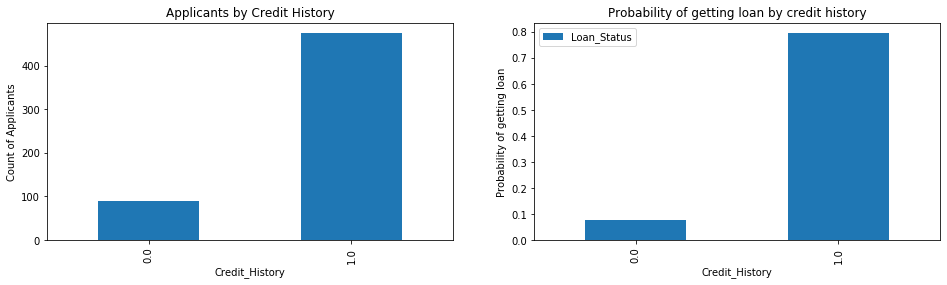

In [115]:
fig = plt.pyplot.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,2,1)
#fig, (ax1, ax2) = plt.pyplot.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')

ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind = 'bar', ax = ax1)


ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')
temp2.plot(kind ='bar', ax = ax2)

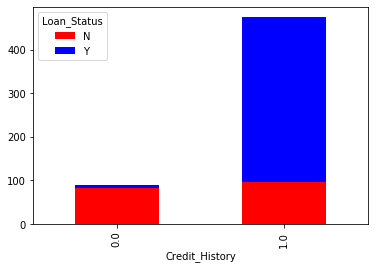

In [116]:
temp3 = pd.crosstab(training_data['Credit_History'], training_data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [117]:
# Replace missing values
training_data['Gender'].fillna(training_data['Gender'].mode()[0], inplace=True)
training_data['Married'].fillna(training_data['Married'].mode()[0], inplace=True)
training_data['Dependents'].fillna(training_data['Dependents'].mode()[0], inplace=True)
training_data['Loan_Amount_Term'].fillna(training_data['Loan_Amount_Term'].mode()[0], inplace=True)
training_data['Credit_History'].fillna(training_data['Credit_History'].mode()[0], inplace=True)

In [118]:
# to fill loan amount we will create a Pivot table, 
# which provides us median values for all the groups of unique values of Self_Employed and Education features.
temp1 = training_data['Credit_History'].value_counts(ascending=True)
temp2 = training_data.pivot_table(values='Loan_Status', index = ['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
training_data['Self_Employed'].fillna('No',inplace=True)
table = training_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [119]:
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
training_data['LoanAmount'].fillna(training_data[training_data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [120]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.410423,0.855049
std,6109.041673,2926.248369,84.145700,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# data processing and feature engineering

In [121]:
#extracting some new features for better performance, and subsiding the effect of extreme values
training_data['LoanAmount_log'] = np.log(training_data['LoanAmount'])
training_data['TotalIncome'] = training_data['ApplicantIncome'] + training_data['CoapplicantIncome']
training_data['TotalIncome_log'] = np.log(training_data['TotalIncome'])
training_data['LoanAmount/TotalIncome'] = training_data['LoanAmount']/training_data['TotalIncome']

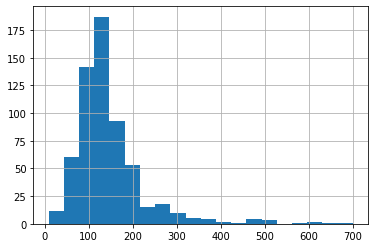

In [122]:
training_data['LoanAmount'].hist(bins=20)

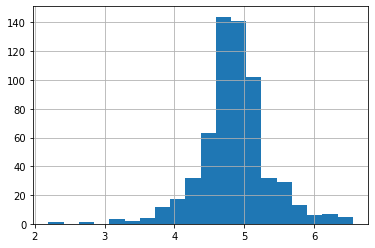

In [123]:
training_data['LoanAmount_log'].hist(bins=20)

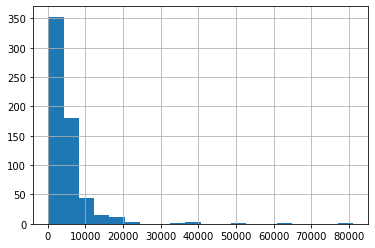

In [124]:
training_data['ApplicantIncome'].hist(bins=20)

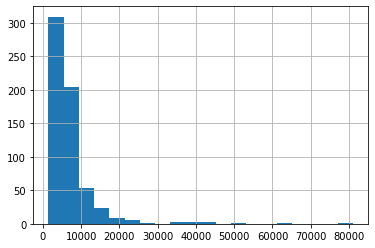

In [125]:
training_data['TotalIncome'].hist(bins=20)

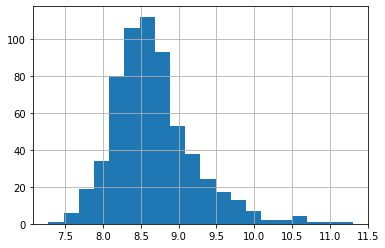

In [126]:
training_data['TotalIncome_log'].hist(bins=20)

In [127]:
 training_data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
LoanAmount_log            0
TotalIncome               0
TotalIncome_log           0
LoanAmount/TotalIncome    0
dtype: int64

In [128]:
#converting all variables into numeric by encoding
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status', 'LoanAmount/TotalIncome']
le = LabelEncoder()
for i in var_mod:
    training_data[i] = le.fit_transform(training_data[i])
training_data.dtypes 

Loan_ID                    object
Gender                      int32
Married                     int32
Dependents                  int32
Education                   int32
Self_Employed               int32
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int32
Loan_Status                 int32
LoanAmount_log            float64
TotalIncome               float64
TotalIncome_log           float64
LoanAmount/TotalIncome      int64
dtype: object

In [129]:
#taking a look of test data
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [130]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [131]:
#checking for missing values on test data
test_data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [132]:
#repeating the same process of replacing the missing values on test data
temp1 = test_data['Credit_History'].value_counts(ascending=True)
temp2 = test_data.pivot_table(values='ApplicantIncome', index = ['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
test_data['Self_Employed'].fillna('No',inplace=True)
table = test_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
test_data['LoanAmount'].fillna(test_data[test_data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

In [133]:
#extracting some new features for better performance, and subsiding the effect of extreme values on test data
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['TotalIncome_log'] = np.log(test_data['TotalIncome'])
test_data['LoanAmount/TotalIncome'] = test_data['LoanAmount']/test_data['TotalIncome']

In [134]:
#converting all variables of test data into numeric by encoding 
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','LoanAmount/TotalIncome']
le = LabelEncoder()
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])

In [135]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  #kf = KFold(data.shape[0], n_splits=5)
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

# Model Training: LogisticRegression

In [136]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, training_data,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [137]:
#We can try different combination of variables:
predictor_var = ['LoanAmount_log', 'TotalIncome', 'Credit_History']
classification_model(model, training_data,predictor_var,outcome_var)

#lets run the model on test data
predictions = model.predict(test_data[predictor_var])

#saving the predictions in a csv file
result1 = pd.DataFrame(list(zip(test_data['Loan_ID'], predictions)), columns = ['Loan_ID','Loan_status'])
result1.replace((1, 0), ('Y', 'N'), inplace=True)
result1.to_csv(r"C:\Users\asus\Desktop\python\loan\result_lr2.csv", index = False)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

# RandomForestClassifier

In [138]:
#lets try a different model say RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log','LoanAmount/TotalIncome']
classification_model(model, training_data, predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.341%


In [139]:
#Here we see that the accuracy is 100% for the training set. 
#This is the ultimate case of overfitting and can be resolved by reducing the number of predictors and 
#tuning the model parameter
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History            0.267012
LoanAmount/TotalIncome    0.192654
TotalIncome_log           0.183244
LoanAmount_log            0.160616
Property_Area             0.044308
Dependents                0.043960
Loan_Amount_Term          0.032096
Married                   0.022847
Education                 0.018714
Gender                    0.017412
Self_Employed             0.017137
dtype: float64


In [140]:
#Let’s use the top 3 variables for creating a model
model = RandomForestClassifier(n_estimators=30, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount/TotalIncome','Credit_History','TotalIncome_log']
classification_model(model, training_data, predictor_var,outcome_var)

Accuracy : 83.550%
Cross-Validation Score : 80.457%


In [141]:
#lets run the model on test data
predictions = model.predict(test_data[predictor_var])
#saving the predictions in a csv file
result2 = pd.DataFrame(list(zip(test_data['Loan_ID'], predictions)), columns = ['Loan_ID','Loan_status'])
result2.replace((1, 0), ('Y', 'N'), inplace=True)
result2.to_csv(r"C:\Users\asus\Desktop\python\loan\result_rfc2.csv", index = False)

# DecisionTreeClassifier

In [142]:
#lets try DecisionTreeClassifier 
model = DecisionTreeClassifier()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','LoanAmount/TotalIncome']
classification_model(model, training_data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 70.845%


In [143]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History            0.292201
LoanAmount/TotalIncome    0.262885
TotalIncome_log           0.242000
LoanAmount_log            0.167050
Dependents                0.035864
dtype: float64


In [144]:
#lets reduce the features
model = DecisionTreeClassifier()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History']
classification_model(model, training_data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 71.014%


In [145]:
#lets run the model on test data 
predictions = model.predict(test_data[predictor_var])
result3 = pd.DataFrame(list(zip(test_data['Loan_ID'], predictions)), columns = ['Loan_ID','Loan_status'])
result3.replace((1, 0), ('Y', 'N'), inplace=True)
result3.to_csv(r"C:\Users\asus\Desktop\python\loan\result_dtc2.csv", index = False)

# Overview of Result

In [146]:
#result of LogisticRegression
#describing result for checking total number of yes for loan_status
result1.describe()

,Loan_ID,Loan_status
count,367,367
unique,367,2
top,LP001735,Y
freq,1,308


In [147]:
result1.head(15)

,Loan_ID,Loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [148]:
#result of RandomForestClassifier
result2.describe()

,Loan_ID,Loan_status
count,367,367
unique,367,2
top,LP001735,Y
freq,1,303


In [149]:
#looking first 15 entries of result
result2.head(15)

,Loan_ID,Loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,N
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [150]:
#result of DecisionTreeClassifier
result3.describe()

,Loan_ID,Loan_status
count,367,367
unique,367,2
top,LP001735,Y
freq,1,240


In [151]:
result3.head(15)

,Loan_ID,Loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


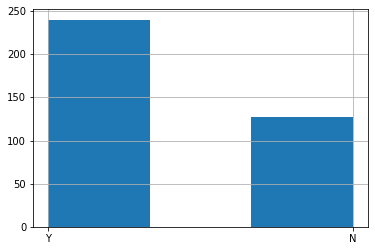

In [152]:
#we have tried three different models to predict the loan status of applicant

result3['Loan_status'].hist(bins=3)

In [153]:
temp1 = result1['Loan_status'].value_counts(ascending=True)
temp2 = result2['Loan_status'].value_counts(ascending=True)
temp3 = result3['Loan_status'].value_counts(ascending=True)

Text(0.5, 1.0, 'DecisionTreeClassifier')

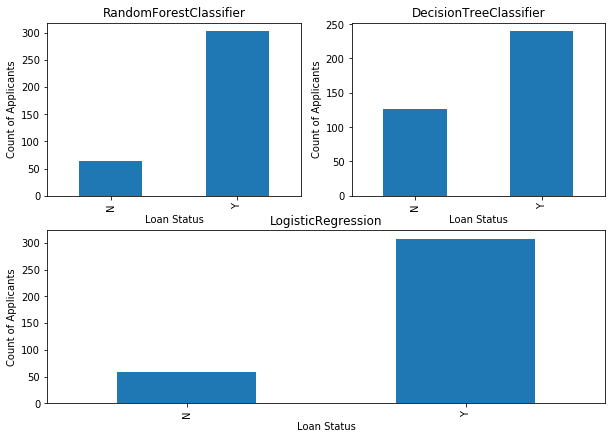

In [154]:
fig = plt.pyplot.figure(figsize = (10,7))
ax1 = fig.add_subplot(212)
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('LogisticRegression')
temp1.plot(kind = 'bar', ax = ax1)           

ax2 = fig.add_subplot(221)          
temp2.plot(kind ='bar', ax = ax2)
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('Count of Applicants')
ax2.set_title('RandomForestClassifier')

ax3 = fig.add_subplot(222)
temp3.plot(kind ='bar', ax = ax3)
ax3.set_xlabel('Loan Status')
ax3.set_ylabel('Count of Applicants')
ax3.set_title('DecisionTreeClassifier')
